In [1]:
##basic library - Pandas and Numpy
import pandas as pd
import numpy as np

## Imports for Data Consistency - String Match
import difflib as dff

## Imports for different type of classfiers
from sklearn import tree # <- Decision- Trees
from sklearn import svm # <- Support Vector Machines
import sklearn.linear_model as linear_model # <- Logisitic Regression - Sigmoid Function on the Linear Regression
from sklearn.ensemble import RandomForestClassifier # <- Random Forest Classifier
from sklearn.neural_network import MLPClassifier # <- Neural Networks
from sklearn.naive_bayes import GaussianNB # <- Gaussian Naive-Bayes Classifier

## Imports for recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Imports for splitting the data into training and test data
from sklearn.model_selection import train_test_split

## Imports for evaluating the different classifier models selected
import sklearn.metrics as metrics
from sklearn import preprocessing

## Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

##Handle Warnings to have clean code
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Define the column names and read the data file into a pandas dataframe
column_names = ['CASE_STATUS', 'EMPLOYER_NAME','SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 
                'FILING_YEAR', 'WORKSITE', 'LONGITUDE', 'LATITUDE']
table_1 = pd.read_table('h1b_kaggle.csv', names = column_names, skiprows = 1, error_bad_lines = False, sep = ',')

.

In [3]:
# Set the display option for the maximum column width to unlimited
pd.set_option('display.max_colwidth', -1)

# Disable the setting of a warning message when modifying a copy of a dataframe
pd.options.mode.chained_assignment = None

# Data Analysis and Data Preprocessing

### Case Status v/s Number of Petitions of the visa petition - Data Analysis1

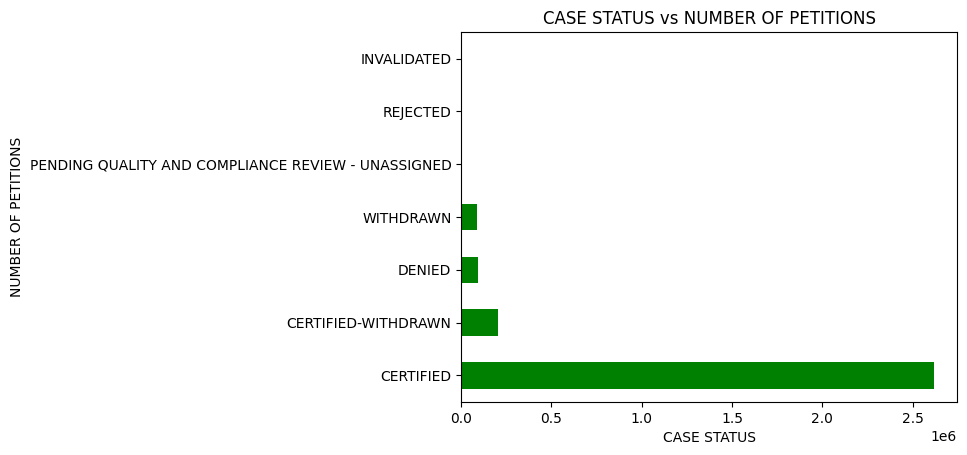

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                   202659 
DENIED                                                94346  
WITHDRAWN                                             89799  
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED    15     
REJECTED                                              2      
INVALIDATED                                           1      
Name: CASE_STATUS, dtype: int64


In [4]:
# Plot a bar chart showing the number of petitions for each case status
plot_status_numberinit = table_1['CASE_STATUS'].value_counts().plot(title='CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind='barh', color='green')
# Set the x-axis label to "CASE STATUS"
plot_status_numberinit.set_xlabel("CASE STATUS")
# Set the y-axis label to "NUMBER OF PETITIONS"
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS")
# Display the plot
plt.show()
# Print the value counts for each case status
print(table_1['CASE_STATUS'].value_counts())

### Data Type and String Data Format conversion to upper case

In [5]:
# Filter the dataframe to only include rows with "CERTIFIED", "DENIED", or "REJECTED" in the 'CASE_STATUS' column
table_2 = table_1.loc[table_1['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

# Convert the 'FILING_YEAR' column to an integer data type
table_2['FILING_YEAR'] = table_2['FILING_YEAR'].astype(int)

# Convert the 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', and 'FULL_TIME_POSITION' columns to uppercase
table_2['EMPLOYER_NAME'] = table_2['EMPLOYER_NAME'].str.upper()
table_2['SOC_NAME'] = table_2['SOC_NAME'].str.upper()
table_2['JOB_TITLE'] = table_2['JOB_TITLE'].str.upper()
table_2['FULL_TIME_POSITION'] = table_2['FULL_TIME_POSITION'].str.upper()

.

### Row Counts v/s Case Status of the visa petition - Data Analysis1

<AxesSubplot:title={'center':'CASE STATUS vs NUMBER OF PETITIONS'}, xlabel='CASE STATUS', ylabel='NUMBER OF PETITIONS'>

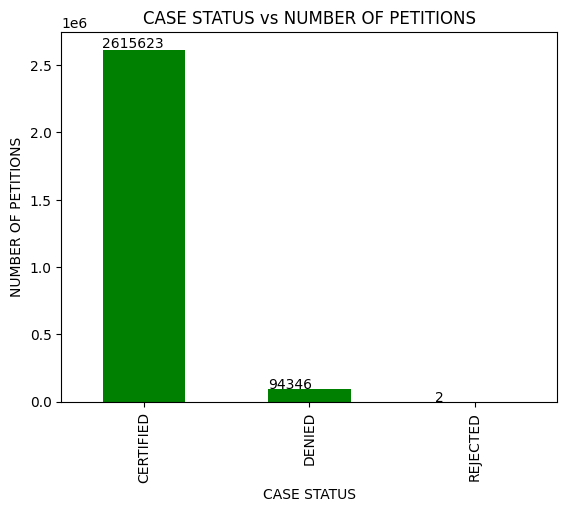

In [6]:
# Create a bar plot of the count of each unique value in the 'CASE_STATUS' column of the 'table_2' dataframe
plot_status_number = table_2['CASE_STATUS'].value_counts().plot(title='CASE STATUS vs NUMBER OF PETITIONS', kind='bar', color='green')

# Set the x-axis label to 'CASE STATUS' and the y-axis label to 'NUMBER OF PETITIONS'
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")

# Add labels to each bar in the plot indicating its count value
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))

# Show the plot
plot_status_number

### The top 15 employers filing the H1-B visa petitions - Data Analysis2

INFOSYS LIMITED                                    130241
TATA CONSULTANCY SERVICES LIMITED                  64358 
WIPRO LIMITED                                      43679 
DELOITTE CONSULTING LLP                            36667 
ACCENTURE LLP                                      32983 
IBM INDIA PRIVATE LIMITED                          28166 
MICROSOFT CORPORATION                              22373 
HCL AMERICA, INC.                                  22330 
ERNST & YOUNG U.S. LLP                             18217 
LARSEN & TOUBRO INFOTECH LIMITED                   16724 
CAPGEMINI AMERICA INC                              16032 
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    15448 
GOOGLE INC.                                        12545 
IGATE TECHNOLOGIES INC.                            12196 
IBM CORPORATION                                    10690 
Name: EMPLOYER_NAME, dtype: int64


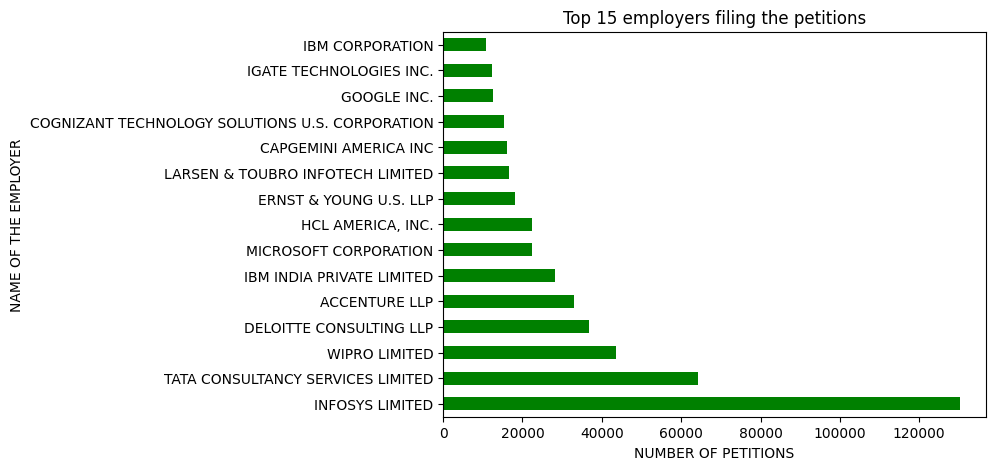

In [7]:
# Create a horizontal bar plot of the count of each unique value in the 'EMPLOYER_NAME' column of the 'table_2' dataframe, for the top 15 employers
plot_status_topemp = table_2['EMPLOYER_NAME'].value_counts().head(15).plot.barh(title="Top 15 employers filing the petitions",\
                                                                                color='green', figsize=(7, 5))

# Set the y-axis label to 'NAME OF THE EMPLOYER' and the x-axis label to 'NUMBER OF PETITIONS'
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")

# Show the plot
plot_status_topemp

# Print the count of each unique value in the 'EMPLOYER_NAME' column of the 'table_2' dataframe, for the top 15 employers
print(table_2['EMPLOYER_NAME'].value_counts().head(15))

### The top 15 SOC names for which H1-B visas are raised - Data Analysis3

AxesSubplot(0.125,0.11;0.775x0.77)


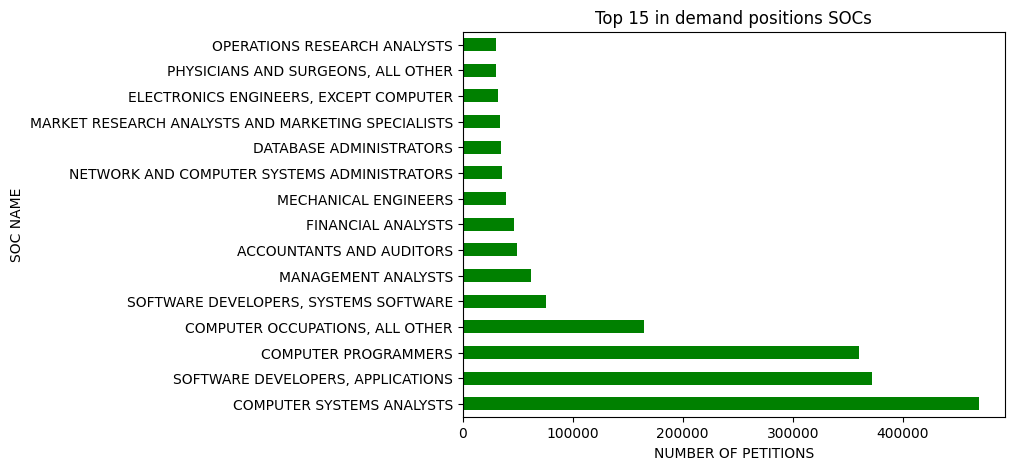

In [8]:
# Create a horizontal bar plot of the count of each unique value in the 'SOC_NAME' column of the 'table_2' dataframe, for the top 15 in-demand positions
plot_status_topsoc = table_2['SOC_NAME'].value_counts().head(15).plot.barh(title="Top 15 in demand positions SOCs", \
                                                                           color='green', figsize=(7, 5))

# Set the y-axis label to 'SOC NAME' and the x-axis label to 'NUMBER OF PETITIONS'
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")

# Show the plot
print(plot_status_topsoc)

# Print the count of each unique value in the 'SOC_NAME' column of the 'table_2' dataframe, for the top 15 in-demand positions
#print(table_2['SOC_NAME'].value_counts().head(15))

### Acceptance rate of the H1-B Visa petitions through different years - Data Analysis4

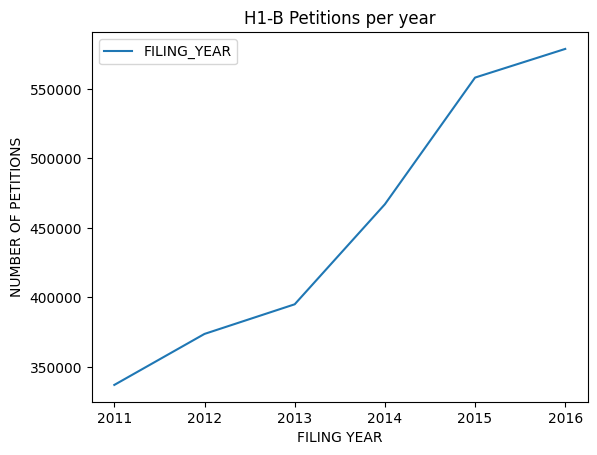

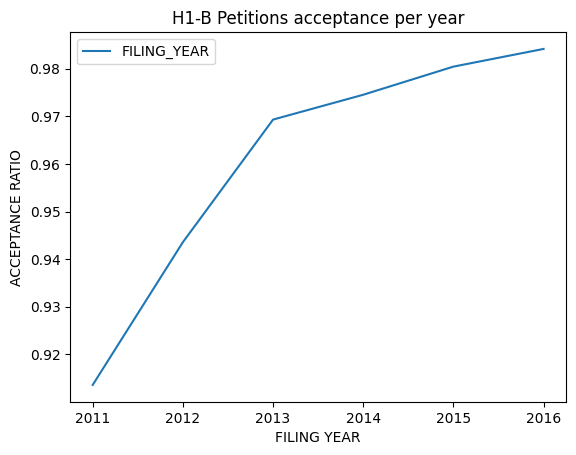

In [9]:
# Create a line plot of H1-B petitions per year
dfplot_status_fyear = pd.DataFrame(table_2['FILING_YEAR'].value_counts())
dfplot_status_fyear = dfplot_status_fyear.sort_values(['FILING_YEAR'])
plot_status_fyear = dfplot_status_fyear.plot(title='H1-B Petitions per year', kind='line')
plot_status_fyear.set_xlabel('FILING YEAR')
plot_status_fyear.set_ylabel('NUMBER OF PETITIONS')
plt.show()

# Create a line plot of H1-B petition acceptance ratio per year
dfstatus_acceptance_peryear = pd.DataFrame(table_2[table_2['CASE_STATUS'] == 'CERTIFIED'].FILING_YEAR.value_counts() / table_2.FILING_YEAR.value_counts())
dfstatus_acceptance_peryear = dfstatus_acceptance_peryear.sort_values(['FILING_YEAR'])
status_acceptance_peryear = dfstatus_acceptance_peryear.plot(title='H1-B Petitions acceptance per year', kind='line')
status_acceptance_peryear.set_xlabel('FILING YEAR')
status_acceptance_peryear.set_ylabel('ACCEPTANCE RATIO')
plt.show()

### Salaries trend per year - Data Analysis5

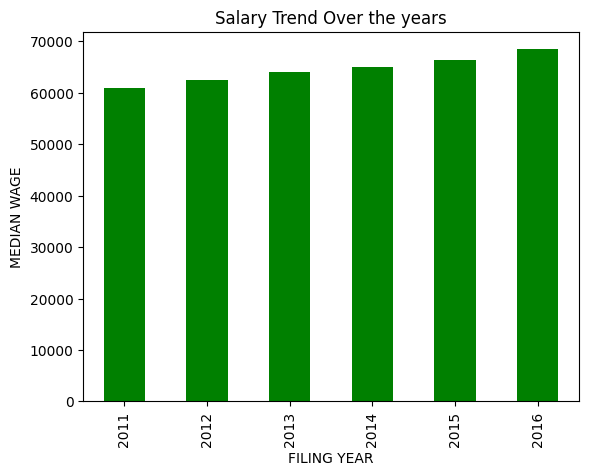

In [10]:
# Create a bar chart of median prevailing wage by year
dfsalaries_trends_year = table_2.loc[:,['PREVAILING_WAGE', 'FILING_YEAR']].groupby(['FILING_YEAR']).agg(['median'])
plot_salaries_trends_year = dfsalaries_trends_year.plot(kind='bar', color='g', legend=None)
plot_salaries_trends_year.set_xlabel('FILING YEAR')
plot_salaries_trends_year.set_ylabel('MEDIAN WAGE')
plt.title('Salary Trend Over the years')
plt.show()

### Step 3: Filter the rows and keep the ones with case status as 'CERTIFIED' or 'DECLINED'

In [11]:
# Print the unique values in the CASE_STATUS column
print(table_2['CASE_STATUS'].unique())

# Filter the DataFrame to include only CERTIFIED and DENIED cases
table_2 = table_2.loc[table_2['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]

['CERTIFIED' 'DENIED' 'REJECTED']


#### Step 4: Remove rows with null values for EMPLOYER_NAME, SOC_NAME, JOB_TITLE, FULL_TIME_POSITION, PREVAILING_WAGE

In [12]:
table_2.isnull().sum(axis = 0)

CASE_STATUS           0    
EMPLOYER_NAME         18   
SOC_NAME              15893
JOB_TITLE             10   
FULL_TIME_POSITION    1    
PREVAILING_WAGE       53   
FILING_YEAR           0    
WORKSITE              0    
LONGITUDE             97071
LATITUDE              97071
dtype: int64

In [13]:
# Drop all rows with missing values in the specified columns
table_3 = table_2.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])

### Step 5: Find the number of certified and denied of all the needed columns with their count

In [14]:
table_3.CASE_STATUS.value_counts()

CERTIFIED    2600241
DENIED       93761  
Name: CASE_STATUS, dtype: int64

### Step 6: Downsampling the Data to match the ratio of certified and denied samples

In [15]:
# Split the data into denied and certified cases
table_temp_2_Dx = table_3[table_3['CASE_STATUS'] == 'DENIED']
table_temp_2_Cx = table_3[table_3['CASE_STATUS'] == 'CERTIFIED']

# Split the certified cases into training and testing sets
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(table_3[table_3.CASE_STATUS == 'CERTIFIED'],\
                                                              table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)

In [16]:
training_dataframe = Input_Certified.append(table_temp_2_Dx)

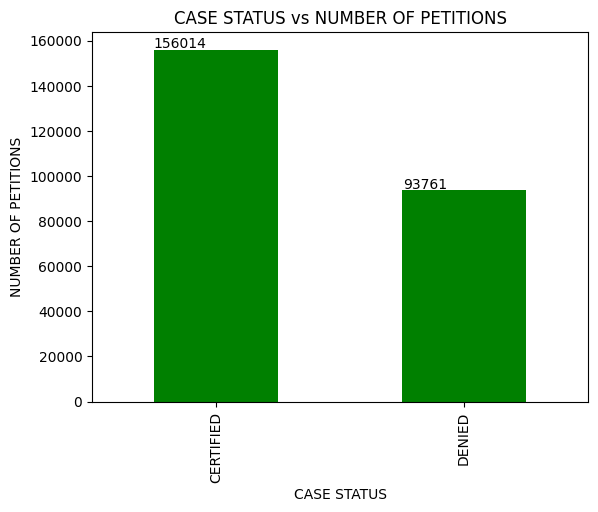

In [17]:
# Create a bar chart to visualize the distribution of certified and denied cases in the training dataset
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title='CASE STATUS vs NUMBER OF PETITIONS', \
                                                                      kind='bar', color='green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")

# Add labels to the bars with the number of petitions
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
    
plt.show()


## Features Creation and Categorisation

For the given categorical data, they need to convert it to numerical values

There are three ways to convert the categorical data to numerical ones.

1. Encoding to ordinal values
2. Feature Hashing
3. One-Hot Encoding

Prior selecting any of the above methods, it is necessary to get the details of the unique values for each of the columns/Features. Below is the plot for the same.

In [18]:
# one-hot encoding for every possible and needed column
# one-hot encoding for every possible and needed column
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  80566
Prevailing Wages  24804
Unique SOCs  983
Unique Job Titles  53272
Unique Filing Year  6
Unique Worksite State  8637
Unique Employment Type  2


In [19]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [20]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [21]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

### Step 9: Feature Creation for One-Hot Encoding

In [22]:
# Apply state_extractor function to the 'WORKSITE' column and store result in same column
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

# Apply wage_categorization function to the 'PREVAILING_WAGE' column and store result in new column 'WAGE_CATEGORY'
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

# Create new DataFrame with columns 'EMPLOYER_NAME' and 'CASE_STATUS'
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
# Create new DataFrame with columns 'SOC_NAME' and 'CASE_STATUS'
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
# Create new DataFrame with columns 'JOB_TITLE' and 'CASE_STATUS'
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]


In [23]:
training_dataframe_1s

,SOC_NAME,CASE_STATUS
831782,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",CERTIFIED
139656,COMPUTER SYSTEMS ANALYSTS,CERTIFIED
2515170,"HEALTH DIAGNOSING AND TREATING PRACTITIONERS, ALL",CERTIFIED
1790210,COMPUTER SYSTEMS ANALYSTS,CERTIFIED
2628239,GENERAL AND OPERATIONS MANAGERS,CERTIFIED
...,...,...
3002370,INSTRUCTIONAL COORDINATORS,DENIED
3002379,ACCOUNTANTS AND AUDITORS,DENIED
3002384,COMPUTER PROGRAMMERS,DENIED
3002390,SALES ENGINEERS,DENIED


In [24]:
# Extracting the most frequent values for "EMPLOYER_NAME"
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
positive_counts = training_dataframe_2_C.value_counts()

# Extracting the most frequent values for "SOC_NAME"
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
positive_counts_s = training_dataframe_2_Cs.value_counts()
# Extracting the most frequent values for "JOB_TITLE"
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts_j = training_dataframe_2_Cj.value_counts()


In [25]:
# Calculate the total counts of employers, SOC names, and job titles in the training dataset
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()


In [26]:
# calculate the ratio of certified cases for each employer and store in a Series
final_ratio_series = positive_counts / total_counts

# fill NaN values with -1
final_ratio_series.fillna(-1, inplace=True)

# apply the categorisation function to each value in the final_ratio_series
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)

# create a new column in the training_dataframe for employer acceptance classification
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)


In [27]:
# Calculate the ratio of certifications to total applications for each SOC_NAME
final_ratio_series_s = positive_counts_s / total_counts_s

# Fill any missing values with -1 (to be categorized separately later)
final_ratio_series_s.fillna(-1, inplace=True)

# Categorize each SOC_NAME using the acceptance ratio
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)

# Map the SOC_ACCEPTANCE classification back to the original dataframe
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [28]:
# Calculate the ratio of certified cases to total cases for each unique job title
final_ratio_series_j = positive_counts_j / total_counts_j
# Fill any NaN values with -1 to represent unknown or missing data
final_ratio_series_j.fillna(-1, inplace=True)
# Apply the categorization function to each ratio value to determine the acceptance level
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
# Map the job acceptance classification to each corresponding job title in the training dataframe
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [29]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


In [30]:
# create dictionaries to map string values to integers
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}

# apply the mappings to the CASE_STATUS and FULL_TIME_POSITION columns
try:
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass

In [31]:
# Convert 'FILING_YEAR' column to integer type
training_dataframe['FILING_YEAR'] = training_dataframe['FILING_YEAR'].astype('int')

# Sort the dataframe by index
training_dataframe.sort_index(inplace=True)

# Keep only the relevant columns in the specified order
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'FILING_YEAR', 'WORKSITE', 'WAGE_CATEGORY', 
                                                'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 
                                                'FULL_TIME_POSITION']]
# Show the first few rows of the resulting dataframe
training_dataframe.head()


,CASE_STATUS,FILING_YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
40,0,2016,WASHINGTON,VERY HIGH,AR,LA,LA,1
48,0,2016,CALIFORNIA,VERY HIGH,AR,LA,LA,1
67,1,2016,GEORGIA,VERY HIGH,VHA,LA,LA,1
71,1,2016,PENNSYLVANIA,VERY HIGH,VHA,LA,LA,1
92,0,2016,MICHIGAN,HIGH,AR,VLA,LA,1


### Step 10: Apply One-hot encoding

In [32]:
# Create final_df_train by applying one-hot encoding on the categorical columns of the training_dataframe
# and dropping the first column of each resulting set of one-hot encoded variables to avoid multicollinearity
final_df_train = pd.get_dummies(training_dataframe, columns=['FILING_YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE'], drop_first=True)

# Print the first few rows of the final_df_train
final_df_train.head()


,CASE_STATUS,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
40,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
48,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
67,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
71,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
92,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Step 11: RFE for feature elimination

In [33]:
# create a logistic regression model
model = LogisticRegression()
# initialize recursive feature elimination with the logistic regression model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=30)
# fit RFE to the training data
fit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])
# get a boolean mask of the selected features
support_rfe = rfe.support_
# get a list of column names from the training data
length_cols = list(final_df_train.iloc[:,1:].columns.values)
# create a list of the selected features
list_selected = []
for index in range(len(length_cols)):
    if support_rfe[index] == True:
        list_selected.append(length_cols[index])
    else:
        pass
# print the list of selected features and the feature ranking
print("Selected features: ", list_selected)
print("Feature ranking: ", rfe.ranking_)

Selected features:  ['FILING_YEAR_2012', 'FILING_YEAR_2013', 'FILING_YEAR_2014', 'FILING_YEAR_2015', 'FILING_YEAR_2016', 'WORKSITE_ALASKA', 'WORKSITE_DISTRICT OF COLUMBIA', 'WORKSITE_KANSAS', 'WORKSITE_KENTUCKY', 'WORKSITE_MAINE', 'WORKSITE_MISSISSIPPI', 'WORKSITE_NA', 'WORKSITE_NORTH DAKOTA', 'WORKSITE_OKLAHOMA', 'WORKSITE_SOUTH DAKOTA', 'FULL_TIME_POSITION_1', 'WAGE_CATEGORY_VERY HIGH', 'EMPLOYER_ACCEPTANCE_HA', 'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA', 'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA', 'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA', 'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VLA']
Feature ranking:  [ 1  1  1  1  1  1 23 14 33 11 38 25  1  9 18 15 36 22 48  6  1  1 29  1
 45 41 46 28  1 40 35  1  7 20  5 27  4 24 19  1 30  1 10 37 31 21  3  1
 26 43 47 42 44 17 13  8 34  1 16 39  1 12  1  1  1  1  1  1  1  1  1  1
  2  1  1 32  1]


In [34]:
# create a list of unique column names
unique_listcols = [col.split('_')[0] for col in list_selected]
# convert the list to a set to remove duplicates
unique_setcols = set(unique_listcols)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
y_test[y_test==1].shape

(31200,)

In [36]:
X_train.head()


,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
363035,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2794145,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2298634,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
256431,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2924320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## Training Classifier

### Decision Tree Classifier

In [45]:
X_test.shape

(49955, 77)

In [ ]:
import seaborn as sns

Test labels:  1069288    1
608356     0
873558     1
2063900    0
879489     1
2280958    1
564763     0
2784494    1
2531142    1
718034     0
Name: CASE_STATUS, dtype: int64
Predicted labels:  [1 0 1 0 1 1 0 1 1 1]

Confusion matrix:
[[14831  3924]
 [ 2228 28972]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     18755
           1       0.88      0.93      0.90     31200

    accuracy                           0.88     49955
   macro avg       0.88      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



Text(50.722222222222214, 0.5, 'Actual Lables')

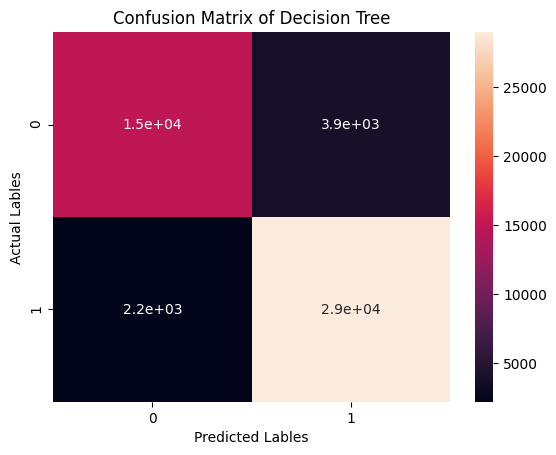

In [43]:
# create a decision tree classifier object
dtree = tree.DecisionTreeClassifier()
# fit the decision tree classifier to the training data
dtree = dtree.fit(X_train, y_train)
# use the trained decision tree classifier to predict the classes of the test data
y_pred = dtree.predict(X_test)
# use the trained decision tree classifier to predict the class probabilities of the test data
y_prob = dtree.predict_proba(X_test)
# print the first 10 test and predicted classes
print("Test labels: ", y_test[:10])
print("Predicted labels: ", y_pred[:10])
print()
# print the confusion matrix and classification report
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,y_pred))
print()
print("Classification report:")
print(metrics.classification_report(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True)
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted Lables')
plt.ylabel('Actual Lables')

### Logistic Regression Classifier

Test labels:  1069288    1
608356     0
873558     1
2063900    0
879489     1
2280958    1
564763     0
2784494    1
2531142    1
718034     0
Name: CASE_STATUS, dtype: int64
Predicted labels:  [1 0 1 0 1 1 0 1 1 1]
Confusion matrix:
[[14545  4210]
 [ 1238 29962]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     18755
           1       0.88      0.96      0.92     31200

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.89      0.89      0.89     49955



Text(50.722222222222214, 0.5, 'Actual Lables')

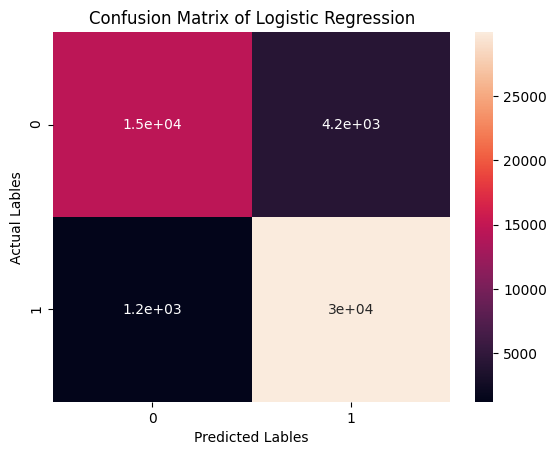

In [44]:
# create a logistic regression classifier object
lr_clf = linear_model.LogisticRegression()
# fit the logistic regression classifier to the training data
lr_clf.fit(X_train, y_train)
# use the trained logistic regression classifier to predict the classes of the test data
y_pred_lr = lr_clf.predict(X_test)
# use the trained logistic regression classifier to predict the class probabilities of the test data
probs = lr_clf.predict_proba(X_test)
# print the first 10 test and predicted classes
print("Test labels: ", y_test[:10])
print("Predicted labels: ", y_pred_lr[:10])
# print the confusion matrix and classification report
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_lr))
print()
print("Classification report:")
print(metrics.classification_report(y_test, y_pred_lr))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True)
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Lables')
plt.ylabel('Actual Lables')